In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
import pathlib
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)

### Dataset

In [2]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [3]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [4]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [5]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [6]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
#train_loss_dict, test_loss_dict = trainer.train(num_epochs)

In [7]:
# We can now plot the training loss with our utility script
"""
# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

#torch.save(model.state_dict(), "saved_model.torch")
#final_loss, final_acc = utils.compute_loss_and_accuracy(
#    dataloader_test, model, loss_function)
#print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")
"""

'\n# Plot loss\nutils.plot_loss(train_loss_dict, label="Train Loss")\nutils.plot_loss(test_loss_dict, label="Test Loss")\n# Limit the y-axis of the plot (The range should not be increased!)\nplt.ylim([0, 1])\nplt.legend()\nplt.xlabel("Global Training Step")\nplt.ylabel("Cross Entropy Loss")\nplt.savefig("image_solutions/task_4a.png")\n\nplt.show()\n\n#torch.save(model.state_dict(), "saved_model.torch")\n#final_loss, final_acc = utils.compute_loss_and_accuracy(\n#    dataloader_test, model, loss_function)\n#print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")\n'

## Plotting example

In [8]:
"""# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

learning_rate = .0192
num_epochs = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
#train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(num_epochs)
num_epochs = 5"""

'# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.\n\n\n# This example code is here to illustrate how you can plot two different models to compare them.\n# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)\n\n# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.\ntorch.random.manual_seed(0)\nnp.random.seed(0)\n\n\ndataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)\nmodel = create_model()\n\nlearning_rate = .0192\nnum_epochs = 6\n\n# Redefine optimizer, as we have a new model.\noptimizer = torch.optim.SGD(model.parameters(),\n                            lr=learning_rate)\ntrainer = Trainer(\n  model=model,\n  dataloader_train=dataloader_train,\n  dataloader_test=dataloader_test,\n  batch_size=batch_size,\n  loss_function=loss_functi

In [9]:
"""# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")
# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

#torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")
"""

'# We can now plot the two models against eachother\n\n# Plot loss\nutils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")\nutils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")\nutils.plot_loss(train_loss_dict, label="Train Loss - Original model")\nutils.plot_loss(test_loss_dict, label="Test Loss - Original model")\n# Limit the y-axis of the plot (The range should not be increased!)\nplt.ylim([0, 1])\nplt.legend()\nplt.xlabel("Global Training Step")\nplt.ylabel("Cross Entropy Loss")\nplt.savefig("image_solutions/task_4a.png")\n\nplt.show()\n\n#torch.save(model.state_dict(), "saved_model.torch")\nfinal_loss, final_acc = utils.compute_loss_and_accuracy(\n    dataloader_test, model, loss_function)\nprint(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")\n'

### Task A

In [10]:
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train_a, dataloader_test_a = dataloaders.load_dataset(batch_size, image_transform)
model_a = create_model()

loss_function_a = torch.nn.CrossEntropyLoss()

# Redefine optimizer, as we have a new model.
optimizer_a = torch.optim.SGD(model_a.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model_a,
  dataloader_train=dataloader_train_a,
  dataloader_test=dataloader_test_a,
  batch_size=batch_size,
  loss_function=loss_function_a,
  optimizer=optimizer_a
)
train_loss_dict_a, test_loss_dict_a = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:05<00:00, 184.68it/s]


In [11]:
final_loss_a, final_acc_a = utils.compute_loss_and_accuracy(
    dataloader_test_a, model_a, loss_function_a)
print(f"Final Test loss: {final_loss_a}. Final Test accuracy: {final_acc_a}")

Final Test loss: 0.3363896762584425. Final Test accuracy: 0.9083


In [12]:
image_transform_norm = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5)
])

dataloader_train_a_normal, dataloader_test_a_normal = dataloaders.load_dataset(batch_size, image_transform_norm)
model_a_normal = create_model()

optimizer_a_normal = torch.optim.SGD(model_a_normal.parameters(),
                            lr=learning_rate)


trainer = Trainer(
  model=model_a_normal,
  dataloader_train=dataloader_train_a_normal,
  dataloader_test=dataloader_test_a_normal,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer_a_normal
)
train_loss_dict_a_normal, test_loss_dict_a_normal = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:06<00:00, 141.25it/s]


In [13]:

final_loss_a_normal, final_acc_a_normal = utils.compute_loss_and_accuracy(
    dataloader_test_a_normal, model_a_normal, loss_function)
print(f"Final Test loss: {final_loss_a_normal}. Final Test accuracy: {final_acc_a_normal}")

Final Test loss: 0.2952012259418228. Final Test accuracy: 0.9151


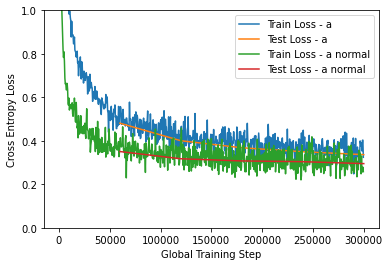

In [14]:
# Plot loss
utils.plot_loss(train_loss_dict_a, label="Train Loss - a")
utils.plot_loss(test_loss_dict_a, label="Test Loss - a")
utils.plot_loss(train_loss_dict_a_normal, label="Train Loss - a normal")
utils.plot_loss(test_loss_dict_a_normal, label="Test Loss - a normal")

plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

### Task B

In [15]:
output_dir_images = pathlib.Path("image_solutions")
output_dir_images.mkdir(exist_ok=True)

weight_image_array = np.zeros(shape=(28, 28))
weight_tensors = list(model_a.children())[1].weight.cpu().data

# 10 tensors since we have 0-9 classes
for tensor_index, tensor in enumerate(weight_tensors):
    # Each tensor has length 28x28
    for index, value in enumerate(tensor):
        weight_image_array[index // 28, index % 28] = value
    
    utils.save_im(output_dir_images.joinpath(f"weights{tensor_index}.jpg"), weight_image_array, cmap="gray")

### Task C

In [16]:
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train_c, dataloader_test_c = dataloaders.load_dataset(batch_size, image_transform_norm)
model_c = create_model()

loss_function_c = torch.nn.CrossEntropyLoss()

# Redefine optimizer, as we have a new model.
optimizer_c = torch.optim.SGD(model_c.parameters(),
                            lr=1.0)
trainer = Trainer(
  model=model_c,
  dataloader_train=dataloader_train_c,
  dataloader_test=dataloader_test_c,
  batch_size=batch_size,
  loss_function=loss_function_c,
  optimizer=optimizer_c
)
train_loss_dict_c, test_loss_dict_c = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:06<00:00, 134.03it/s]


In [17]:
final_loss_c, final_acc_c = utils.compute_loss_and_accuracy(
    dataloader_test_c, model_c, loss_function_c)
print(f"Final Test loss: {final_loss_c}. Final Test accuracy: {final_acc_c}")

Final Test loss: 4.9587852840970275. Final Test accuracy: 0.7967


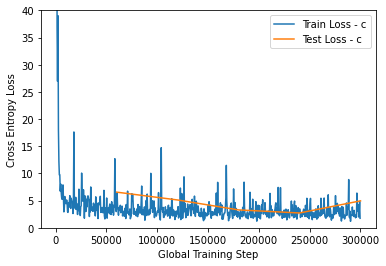

In [18]:
# Plot loss
utils.plot_loss(train_loss_dict_c, label="Train Loss - c")
utils.plot_loss(test_loss_dict_c, label="Test Loss - c")

plt.ylim([0, 40])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4c.png")

plt.show()

### Task D

In [19]:
def create_model_d():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 64),
        # No need to include softmax, as this is already combined in the loss function
        nn.ReLU(),  # ReLU as activation funciton for the layer above
        nn.Linear(64, 10),  # 64 inputs, 10 outputs
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model

In [20]:
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train_d, dataloader_test_d = dataloaders.load_dataset(batch_size, image_transform_norm)
model_d = create_model_d()

loss_function_d = torch.nn.CrossEntropyLoss()

# Redefine optimizer, as we have a new model.
optimizer_d = torch.optim.SGD(model_d.parameters(),
                            lr=learning_rate)
trainer = Trainer(
  model=model_d,
  dataloader_train=dataloader_train_d,
  dataloader_test=dataloader_test_d,
  batch_size=batch_size,
  loss_function=loss_function_d,
  optimizer=optimizer_d
)
train_loss_dict_d, test_loss_dict_d = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:07<00:00, 129.66it/s]


In [21]:
final_loss_d, final_acc_d = utils.compute_loss_and_accuracy(
    dataloader_test_d, model_d, loss_function_d)
print(f"Final Test loss: {final_loss_d}. Final Test accuracy: {final_acc_d}")

Final Test loss: 0.21728395270243003. Final Test accuracy: 0.9369


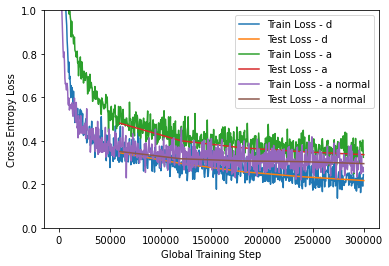

In [22]:
# Plot loss
utils.plot_loss(train_loss_dict_d, label="Train Loss - d")
utils.plot_loss(test_loss_dict_d, label="Test Loss - d")
utils.plot_loss(train_loss_dict_a, label="Train Loss - a")
utils.plot_loss(test_loss_dict_a, label="Test Loss - a")
utils.plot_loss(train_loss_dict_a_normal, label="Train Loss - a normal")
utils.plot_loss(test_loss_dict_a_normal, label="Test Loss - a normal")

plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4d.png")

plt.show()